# Data Science Final Project: California Housing

## 1. Load the Data

In [1]:
cal_housing <- read.csv("housing.csv")

## 2. Explore and Visualize Data for Insights

### a)

In [2]:
dim(cal_housing)

[1] 20640    10

There are 20640 observations in the data set. 

In [3]:
summary(cal_housing$housing_median_age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   18.00   29.00   28.64   37.00   52.00 

In [4]:
summary(cal_housing$total_rooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2    1448    2127    2636    3148   39320 

In [5]:
summary(cal_housing$total_bedrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0   296.0   435.0   537.9   647.0  6445.0     207 

There are no missing values in housing_median_age and total_rooms. There are 207 missing values in total_bedrooms. 

In [6]:
summary(cal_housing$longitude)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -124.3  -121.8  -118.5  -119.6  -118.0  -114.3 

In [7]:
summary(cal_housing$latitude)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.54   33.93   34.26   35.63   37.71   41.95 

In [8]:
summary(cal_housing$population)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3     787    1166    1425    1725   35682 

In [9]:
summary(cal_housing$households)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   280.0   409.0   499.5   605.0  6082.0 

In [10]:
summary(cal_housing$median_income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4999  2.5634  3.5348  3.8707  4.7432 15.0001 

In [11]:
summary(cal_housing$median_house_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14999  119600  179700  206856  264725  500001 

In [12]:
sum(is.na(cal_housing$ocean_proximity))

[1] 0

There are no other columns with missing values. 

In [13]:
#print(cal_housing$ocean_proximity)

### b)

There are four levels: NEAR OCEAN, NEAR BAY, <1H OCEAN, INLAND

### c)

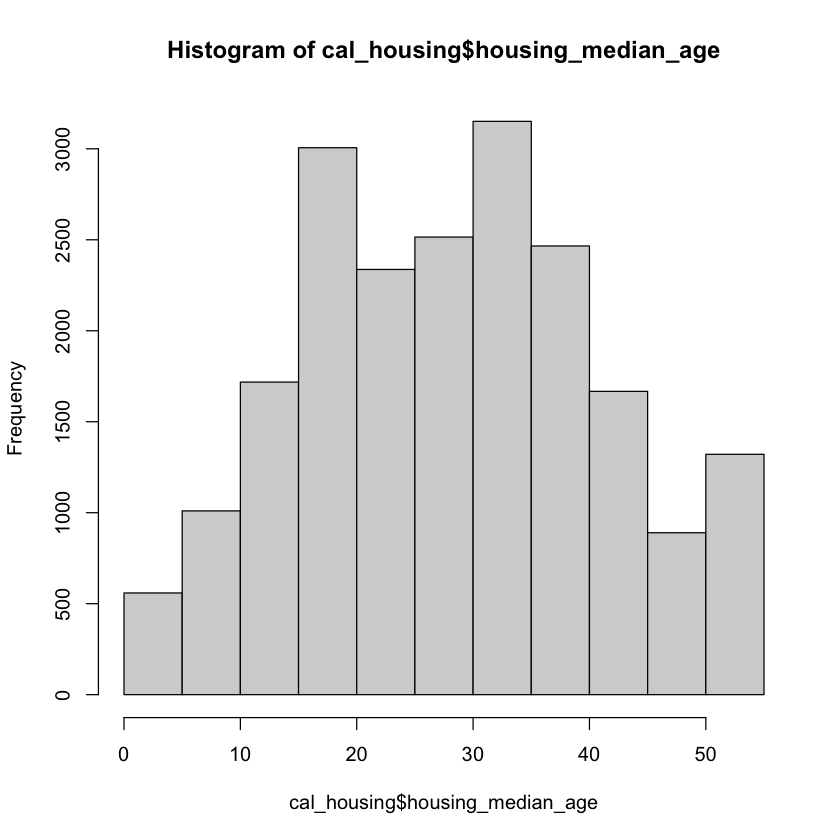

In [14]:
hist(cal_housing$housing_median_age)

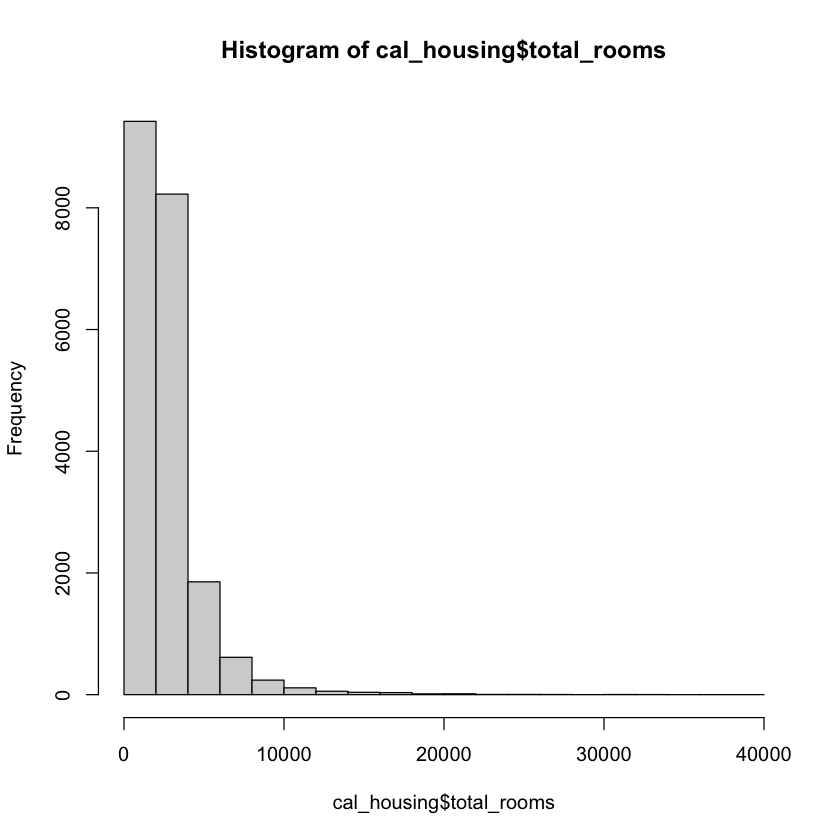

In [15]:
hist(cal_housing$total_rooms)

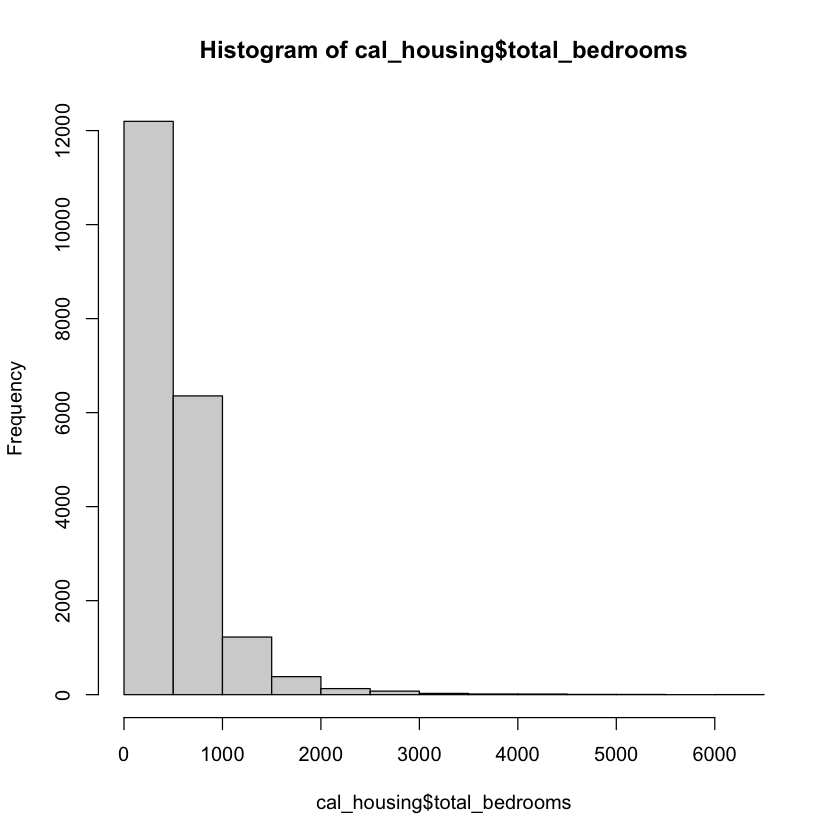

In [16]:
hist(cal_housing$total_bedrooms)

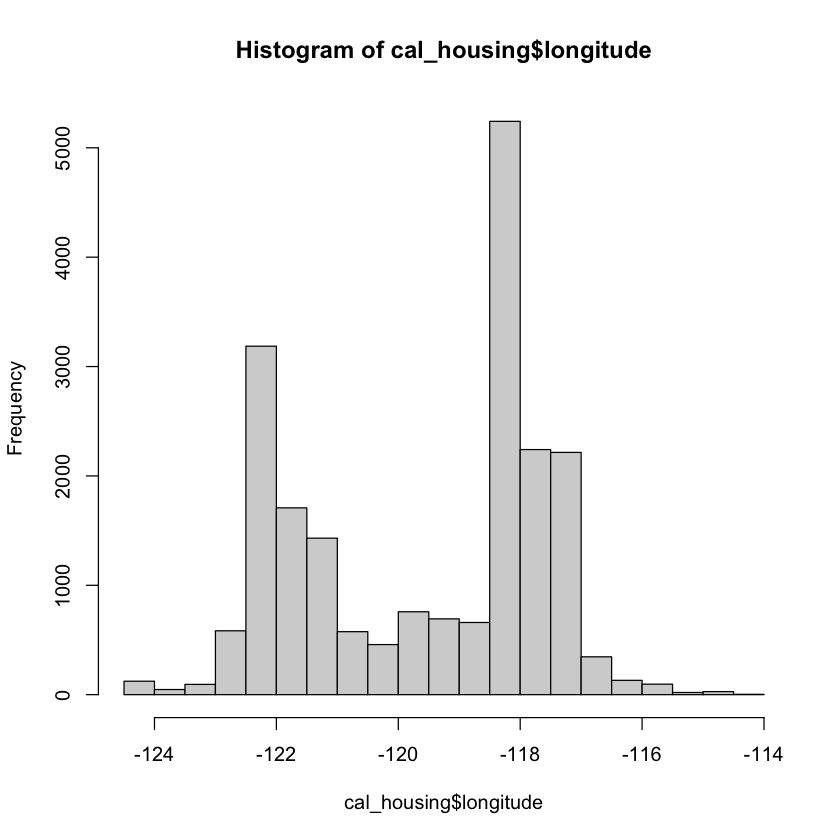

In [17]:
hist(cal_housing$longitude)

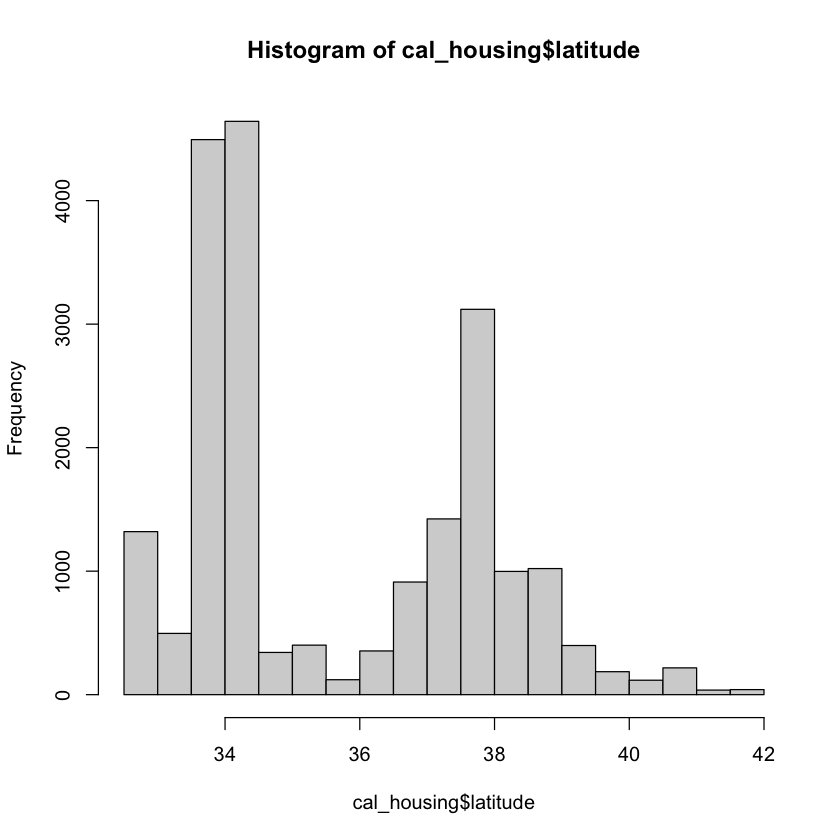

In [18]:
hist(cal_housing$latitude)

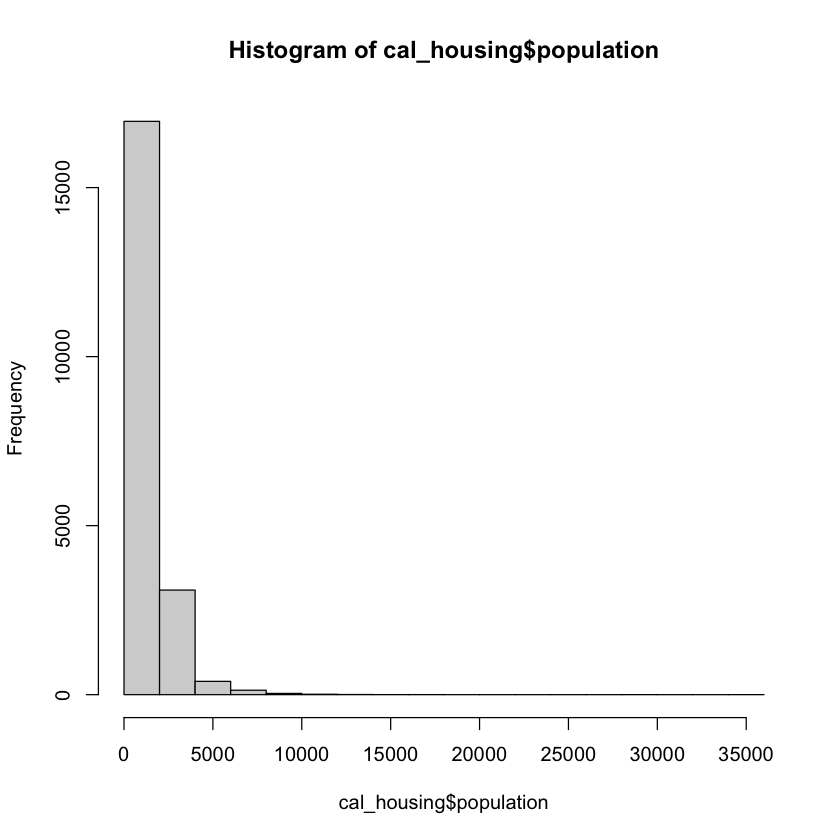

In [19]:
hist(cal_housing$population)

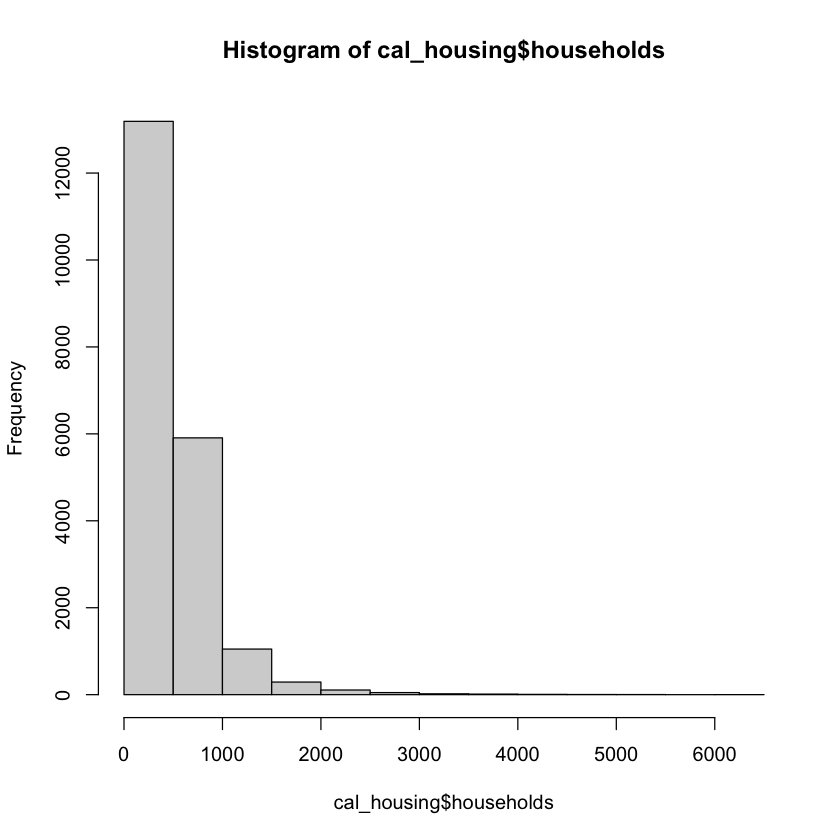

In [20]:
hist(cal_housing$households)

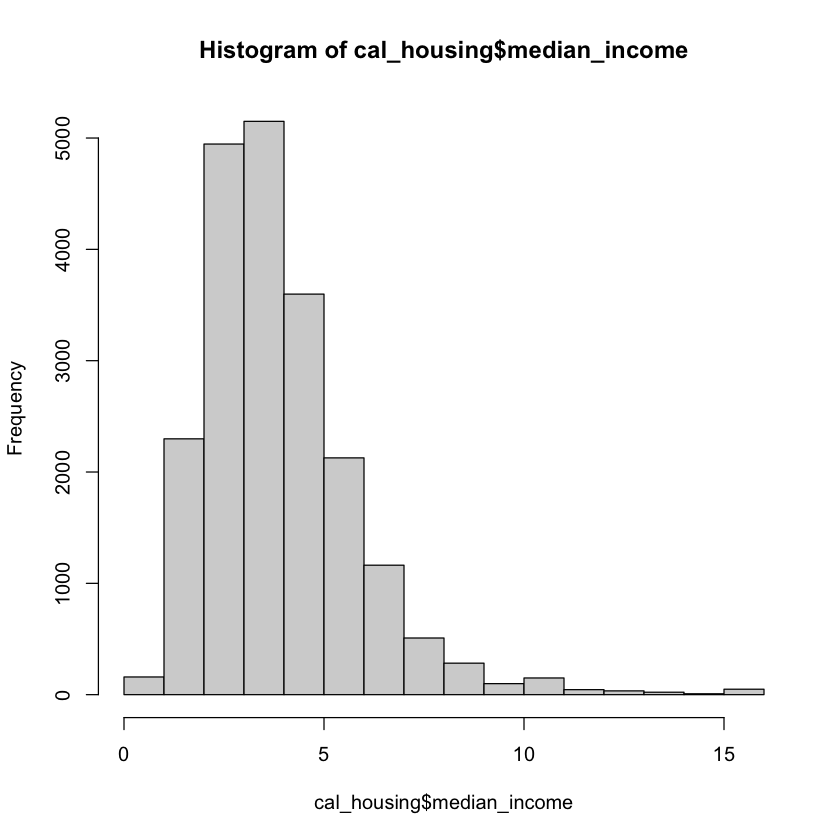

In [21]:
hist(cal_housing$median_income)

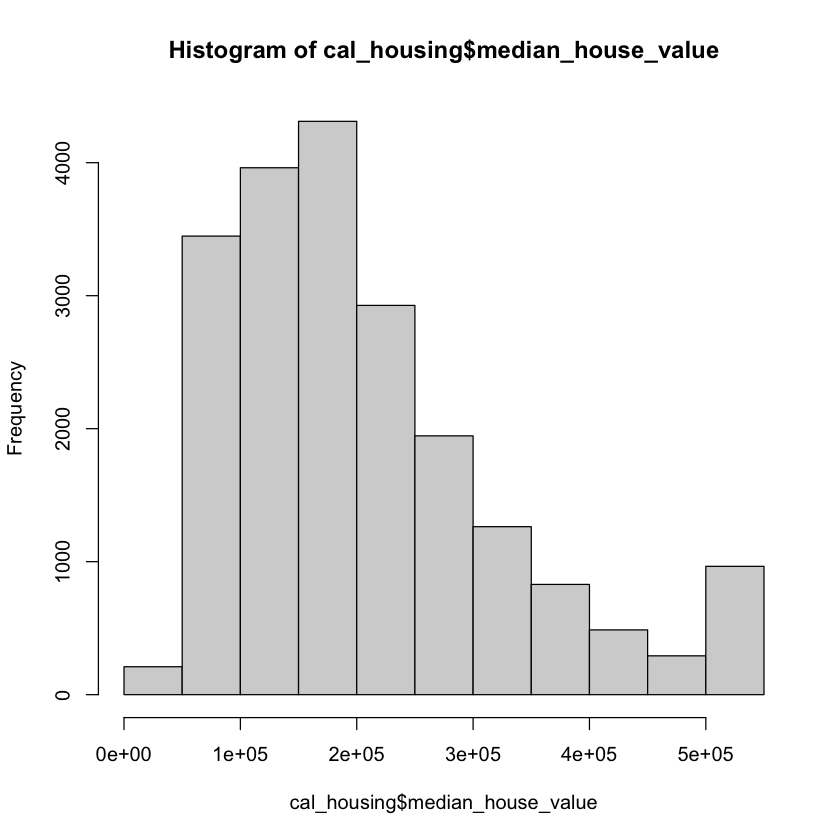

In [22]:
hist(cal_housing$median_house_value)

I don't think any of the variables were particularly surprising. The median_income was interesing, although it was definitely quite close to the distribution I was thinking. I believe the units of median_income is 10,000s of dollars. housing_median_age is the median age of houses (within a unit of area). total_rooms is the number of rooms and total_bedrooms is the number of bedrooms (within a unit of area). longitude and latitude are the longitude and latitude of the house. households is the number of households (within a unit of area). median_income is the median income (within a unit of area). median_house_value is the median_house_value (within a unit of area). The data also caps off at a maximum median income of 150,000 (within a unit of area) and maximum median home value of 500,000 (within a unit of area). This is visiable in the extra rightmost peak in the median house value histogram. I assume this unit of area is a block. Upon doing some research on the dataset, the unit of area is indeed a block. 

### d)

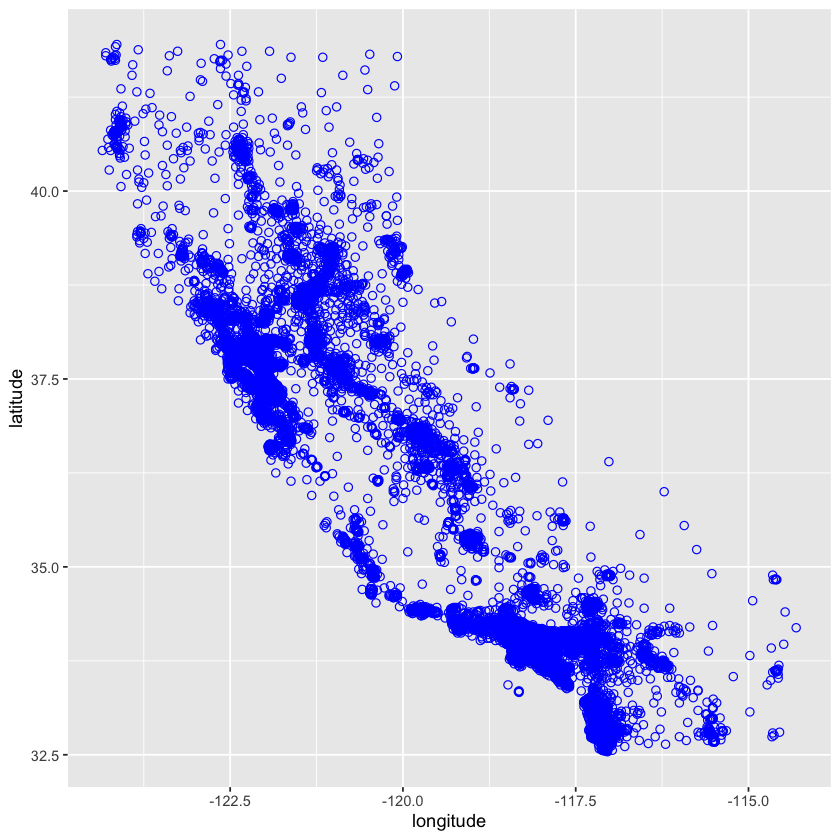

In [23]:
library(ggplot2)
ggplot(cal_housing, aes(x=longitude, y=latitude)) +
  geom_point(size=2, color="blue", shape=1)

That's so cool!!! It looks like California, LOL. 

### e)

In [24]:
cor(cal_housing$median_income, cal_housing$median_house_value)

[1] 0.6880752

In [25]:
cor(cal_housing$housing_median_age, cal_housing$median_house_value)

[1] 0.1056234

In [26]:
cor(cal_housing$total_rooms, cal_housing$median_house_value)

[1] 0.1341531

In [27]:
cor(cal_housing$total_bedrooms, cal_housing$median_house_value)

[1] NA

In [28]:
cor(cal_housing$longitude, cal_housing$median_house_value)

[1] -0.04596662

In [29]:
cor(cal_housing$latitude, cal_housing$median_house_value)

[1] -0.1441603

In [30]:
cor(cal_housing$population, cal_housing$median_house_value)

[1] -0.02464968

In [31]:
cor(cal_housing$households, cal_housing$median_house_value)

[1] 0.06584265

So, the only variable that has a standard correlation coefficient even remotely close to 1 is median_income. The correlation is useful in telling us whether two variables are likely linearly correlated. I don't think it's just a coincidence as people with general higher income would be able to afford generally more expensive houses. 

## 3. Prepare The Data for Machine Learning Algorithms: 

### a)

In [32]:
# Method 3: impute missing NAs with median 
cal_housing$total_bedrooms[is.na(cal_housing$total_bedrooms)] <- 
median(cal_housing$total_bedrooms, na.rm=TRUE) 
summary(cal_housing$total_bedrooms) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   297.0   435.0   536.8   643.2  6445.0 

### b)

In [33]:
library(dplyr) 
cal_housing <- cal_housing %>% 
   filter(median_house_value < 500000) %>% 
   mutate(rooms_per_house = total_rooms / households) %>% 
   mutate(population_per_house = population / households) %>% 
   mutate(ocean_proximity = as.factor(ocean_proximity)) %>% 
   mutate_at(vars(-ocean_proximity, -median_house_value, -
median_income), funs(scale)) %>% 
   data.matrix %>% data.frame


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


### c)

In [34]:
set.seed(365)# for repeatability of the test sample we get 
 train_id <- sample(nrow(cal_housing), size = 
0.8*nrow(cal_housing)) 
 train_set <- cal_housing[train_id,] 
 test_set <- cal_housing[-train_id,] 
 print (paste(nrow(train_set), "train +", nrow(test_set), "test")) 
 #"15718 train + 3930 test"  

[1] "15718 train + 3930 test"


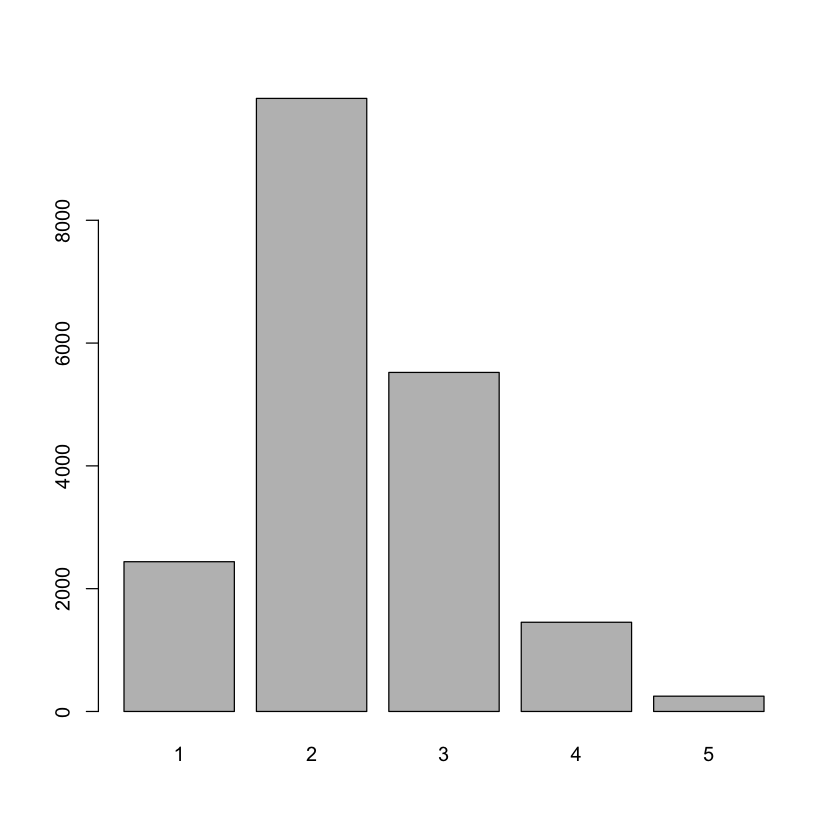

In [35]:
#Convert median income into categorical variables with 5 levels 
 cal_housing <- cal_housing %>%  
  mutate(income_level = ceiling(median_income/2)) %>% 
  mutate(income_level = factor(ifelse(income_level >= 5, 5, 
income_level))) %>% 
   select(-median_income) 
plot(cal_housing$income_level)

In [36]:
#install.packages("caret")

In [37]:
#Stratified Sampling 
 library (caret)       
 train_str_id <- createDataPartition(cal_housing$income_level, p =.8, 
                                    list = FALSE, times = 1) 
 train_str <- cal_housing[train_str_id,] 
 test_str <- cal_housing[-train_str_id,]

Loading required package: lattice



## 4. Fit models on the dataset. 

### a)

In [38]:
model_lm <- lm(median_house_value~.,data = train_str) 

In [39]:
predict_lm_train <- predict(model_lm, train_str) 
sqrt(mean((train_str$median_house_value - predict_lm_train)^2)) 

[1] 63450.96

### b)

In [40]:
# Decision tree model 
library(rpart) 
model_decision_tree <- rpart(median_house_value~.,data = 
train_str, method = "anova", control = rpart.control(minsplit = 2, 
cp=0.001)) 
#make prediction       
predict_decision_tree <- predict(model_decision_tree, train_str) 
#calculate RMSE error 
sqrt(mean((train_str$median_house_value - 
predict_decision_tree)^2))

[1] 53505.85

In [42]:
# Support Vector Machine Regression model 
library(e1071) 
model_svm <- svm(median_house_value~.,data = train_str, cost = 10) 
predict_svm <- predict(model_svm, train_str) 
sqrt(mean((train_str$median_house_value - predict_svm)^2)) 

[1] 50169.82

### c)

In [43]:
# randomly shuffle your data  
cal_housing_copy <- cal_housing[sample(nrow(cal_housing)),] 
 
#Create 10 equally size folds 
folds <- cut(seq(1,nrow(cal_housing_copy)),breaks=10,labels=FALSE)

#Perform 10 fold cross validation 
 MSE_lm <- 0 
 MSE_tree <- 0 
 MSE_svm <- 0 
 
 for(i in 1:10){ 
     #Segement your data by fold using the which() function  
     testIndexes <- which(folds==i,arr.ind=TRUE) 
     testData <- cal_housing_copy[testIndexes, ] 
     trainData <- cal_housing_copy[-testIndexes, ] 
     
     # fit in the models 
     lm_model <- lm(median_house_value~., trainData) 
     tree_model <- rpart(median_house_value~.,data = trainData, 
method = "anova", 
                control = rpart.control(minsplit = 2, cp = 0.001)) 
     svm_model <- svm(median_house_value~.,data = trainData, cost = 
10) 
     
     # make predictions 
     predict1 <- predict(lm_model, testData) 
     predict2 <- predict (tree_model, testData) 
     predict3 <- predict(svm_model, testData) 
     
     #update MSE 
     MSE_lm <- MSE_lm + sum(folds == i)/nrow(cal_housing_copy) * 
mean((predict1 - testData$median_house_value)^2) 
     MSE_tree <- MSE_tree + sum(folds == i)/nrow(cal_housing_copy)* 
     mean((predict2 - testData$median_house_value)^2) 
     MSE_svm <- MSE_svm + sum(folds == i)/nrow(cal_housing_copy)* 
mean((predict3 - testData$median_house_value)^2) 
     
 } 
 
sqrt(MSE_lm) 
sqrt(MSE_tree) 
sqrt(MSE_svm) 


[1] 63827.97

[1] 55522.45

[1] 52559.62

Ok, so MSE has stayed relatively the same for all of the model with an error of <2000 so I think overfitting is not too large of a concern here. 

## 5. Fine tuning our model: 

### a)

In [44]:
#applying grid search 
tuneResult1 <- tune.rpart(median_house_value~., data = train_str, 
minsplit = c(5,10,15, 20), cp = c(0.1,0.01,0.001,0.0001)) 
tune_tree <- tuneResult1$best.model #get the best model 
 
 #find RMSE value of the best model 
predict_tree <- predict(tune_tree, train_str)  
sqrt(mean((train_str$median_house_value - predict_tree)^2)) 

[1] 39871

### b)

In [45]:
#applying grid search 
tuneResult2 <- tune.svm(median_house_value ~., data = train_str, 
cost=10^(-1:2), gamma=c(0.1,0,1)) 
tune_svm <- tuneResult2$best.model #get best model 
 
#find RMSE of the best model 
predict_svm <- predict (tune_svm, train_str) 
sqrt(mean((train_str$median_house_value - predict_svm)^2)) 

[1] 44145.71

### c)

In [46]:
predict_tree_final <-predict(tune_tree, test_str) 
sqrt(mean((test_str$median_house_value - predict_tree_final)^2))

[1] 51884.71

In [47]:
predict_svm_final <- predict(tune_svm, test_str) 
sqrt(mean((test_str$median_house_value - predict_svm_final)^2))

[1] 51316.52

In [48]:
summary(tune_svm)


Call:
best.svm(x = median_house_value ~ ., data = train_str, gamma = c(0.1, 
    0, 1), cost = 10^(-1:2))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  11745






## Conclusion

In conclusion, the best model ended up being the radial SVM model with cost 100, gamma 0.1, and epsilon 0.1 and had 11745 support vectors. This was really interesting because, personally, I thought that the Decision Tree would be the best. Processing data was kinda the hardest part along with the stratified random sampling. The k-fold cross validation was slightly easier than I thought it would be. I must the run times for the hyperparameter tuning was really long, I had to run it overnight! Also, I made all the regular regression/machine learning assumptions for running each of the models on the data. 